In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows', None)

In [2]:
Patches = pd.read_csv('Patches.csv') 

In [3]:
Patches.head()

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Tree
0,2596,3,258,0,510,6279,Other
1,2590,2,212,-6,390,6225,Other
2,2804,9,268,65,3180,6121,Other
3,2785,18,242,118,3090,6211,Other
4,2595,2,153,-1,391,6172,Other


In [4]:
Patches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 7 columns):
Elevation                             15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Tree                                  15120 non-null object
dtypes: int64(6), object(1)
memory usage: 827.0+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FCEF4DC148>,
      dtype=object)

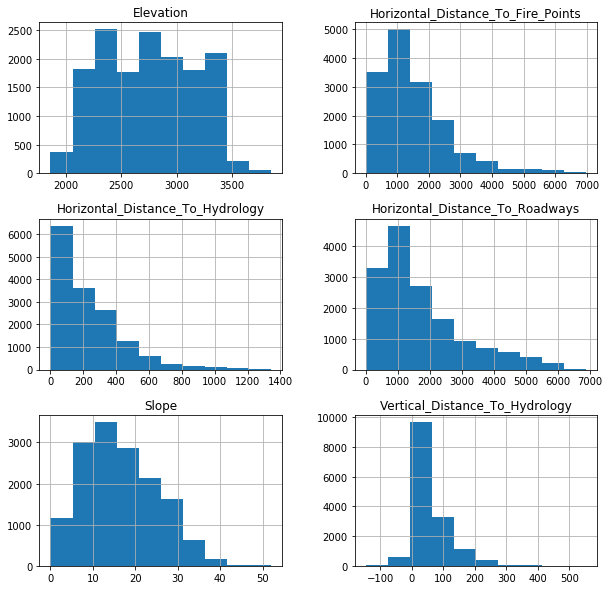

In [5]:
Patches.hist(figsize=(10,10))

In [6]:
Patches.isnull().any()

Elevation                             False
Slope                                 False
Horizontal_Distance_To_Hydrology      False
Vertical_Distance_To_Hydrology        False
Horizontal_Distance_To_Roadways       False
Horizontal_Distance_To_Fire_Points    False
Tree                                  False
dtype: bool

In [7]:
Patches.describe()

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,16.501587,227.195701,51.076521,1714.023214,1511.147288
std,417.678187,8.453927,210.075296,61.239406,1325.066358,1099.936493
min,1863.000000,0.000000,0.000000,-146.000000,0.000000,0.000000
25%,2376.000000,10.000000,67.000000,5.000000,764.000000,730.000000
50%,2752.000000,15.000000,180.000000,32.000000,1316.000000,1256.000000
75%,3104.000000,22.000000,330.000000,79.000000,2270.000000,1988.250000
max,3849.000000,52.000000,1343.000000,554.000000,6890.000000,6993.000000


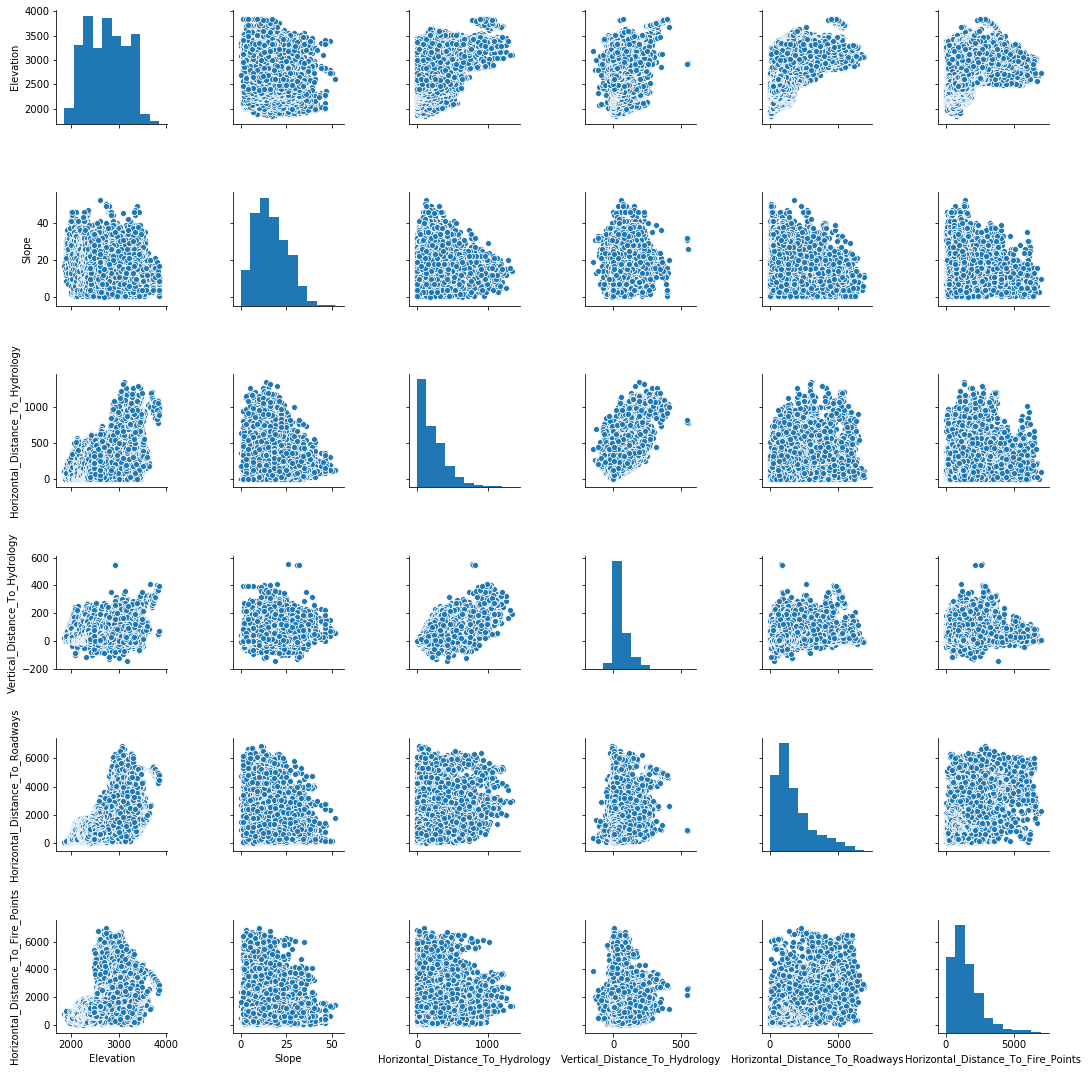

In [8]:
import seaborn as sns
sns.pairplot(Patches)

In [9]:
converter = LabelEncoder()
Patches['Tree'] = converter.fit_transform(Patches['Tree'].astype(str))


In [10]:
# Plotting Correlation Heatmap
corr = Patches.corr()
figure = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap_Anand.html')

'corrheatmap_Anand.html'

In [11]:
Patches.drop(['Vertical_Distance_To_Hydrology'], axis = 1).head() 


,Elevation,Slope,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Tree
0,2596,3,258,510,6279,0
1,2590,2,212,390,6225,0
2,2804,9,268,3180,6121,0
3,2785,18,242,3090,6211,0
4,2595,2,153,391,6172,0


In [12]:
# Dividing dataset into label and feature sets
X = Patches.drop('Tree', axis = 1) # Features
Y = Patches['Tree'] # Labels


In [13]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(Patches)


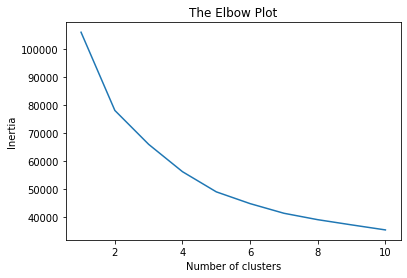

In [14]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

    
#Displaying the Elbow Plot    
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()    


[70295.99462798744, -27810.375750500287, -12058.287011356748, -9722.570264684698, -7170.610611474178, -4186.477703863704, -3427.9532454926884, -2282.062757935426, -1845.4706712082116, -1792.1866114715012]


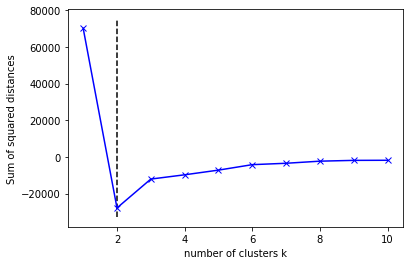

The Knee point is :  2


In [15]:
#Computing the Distance between the Points in the Elbow plot
derivates = []
for i in range(len(inertia)):
    derivates.append(inertia[i] - inertia[i-1])    
print(derivates)    

x = range(1, len(derivates)+1)

#Locating the Knee Point
kn = KneeLocator(x, derivates, curve='convex', direction='decreasing')
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(x, derivates, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()    
    
print("The Knee point is : ",
      kn.knee)    


In [16]:
kmeans = KMeans(n_clusters = kn.knee)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Implementing PCA to visualize dataset
pca = PCA(n_components = 3)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))
print("Cluster Centers: \n",kmeans.cluster_centers_)

fig = px.scatter_3d(x_pca, x=x_pca[:,0], y=x_pca[:,1], z=x_pca[:,2],
              color=kmeans.labels_)
offline.plot(fig,filename='pca_Anand.html')



In [17]:
# Creating Customer Category from their account balance
def converter(colun):
    if colun <= 2333:
        return 0 # near Horizontal_Distance_To_Fire_Points
    elif colun > 2333 and colun <= 4666:
        return 1 # less Horizontal_Distance_To_Fire_Points
    else:
        return 2 # far away Horizontal_Distance_To_Fire_Points

In [18]:
Patches['Horizontal_Distance_To_Fire_Points']=Patches['Horizontal_Distance_To_Fire_Points'].apply(converter)

In [19]:
# Dividing dataset into label and feature sets
X = Patches.drop('Horizontal_Distance_To_Fire_Points', axis = 1) # Features
Y = Patches['Horizontal_Distance_To_Fire_Points'] # Labels

In [20]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(Patches)

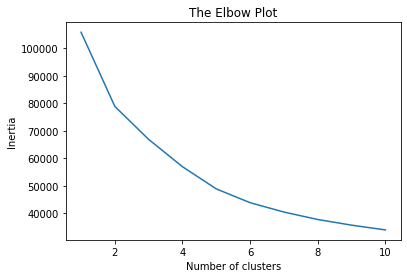

In [21]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

#Displaying the Elbow Plot    
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()    

In [22]:
#Computing the Distance between the Points in the Elbow plot
derivates = []
for i in range(len(inertia)):
    derivates.append(inertia[i] - inertia[i-1])    
print(derivates)    

x = range(1, len(derivates)+1)

[71870.83092956143, -26978.961210561465, -11988.928579000145, -9927.743681746055, -8067.975614691233, -5009.092824296022, -3410.100843005952, -2706.3195080877413, -2050.8163092629693, -1730.8923589098558]


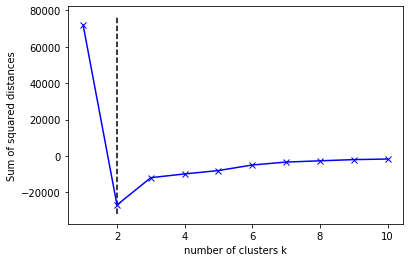

The Knee point is :  2


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
#Locating the Knee Point
kn = KneeLocator(x, derivates, curve='convex', direction='decreasing')
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(x, derivates, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()    
    
print("The Knee point is : ",
      kn.knee)    

kmeans = KMeans(n_clusters = kn.knee)
kmeans.fit(X_scaled)


In [24]:
pca = PCA(n_components = 3)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

fig = px.scatter_3d(x_pca, x=x_pca[:,0], y=x_pca[:,1], z=x_pca[:,2],
              color=kmeans.labels_)
#fig.show()

print("Cluster Centers: \n",kmeans.cluster_centers_)
Tree=list(Patches['Tree'])
elevation = list(Patches['Elevation'])
Distance_To_Roadways =list(Patches['Horizontal_Distance_To_Roadways'])
Distance_To_Fire_Points =list(Patches['Horizontal_Distance_To_Fire_Points'])

fig = go.Figure(data=[go.Scatter3d(
    x=x_pca[:,0], y=x_pca[:,1], z=x_pca[:,2],
    mode='markers',
    marker=dict(color=Y, colorscale='sunset', opacity=0.5),text=[f'Tree: {a}; elevation:{b}; Horizontal_Distance_To_Roadways:{c}; Horizontal_Distance_To_Fire_Points:{d}'
                                      for a,b,c,d in list(zip(Tree,elevation,Distance_To_Roadways,Distance_To_Fire_Points))],
                                hoverinfo='text'
)])
offline.plot(fig,filename='pca_Anand.html')


Variance explained by each of the n_components:  [0.34682555 0.24063484 0.12434111]
Total variance explained by the n_components:  0.7118015096030939
Cluster Centers: 
 [[-0.58985162  0.28561483 -0.27935002 -0.03798968 -0.50860772 -0.39190899
  -0.39611996]
 [ 0.97618112 -0.47268125  0.46231325  0.06287142  0.84172568  0.64859389
   0.65556288]]


'pca_Anand.html'